## Коптев Дмитрий
# Задача 1

https://github.com/rustam-azimov/graph-course-itmo/blob/main/tasks/task1.md

In [1]:
# pip install python-graphblas[default]

In [2]:
import graphblas as gb
gb.init("suitesparse", blocking=False)
from graphblas import Matrix, dtypes, unary, binary, monoid, semiring, Recorder
from graphblas.io import mmread
import numpy as np

In [3]:
M = mmread('karate.mtx')
M

"M_0"      nvals  nrows  ncols  dtype     format
gb.Matrix    156     34     34   FP64  csr (iso)
------------------------------------------------
     0    1    2    3    4    5    6    7    8    9   ...   24   25   26   27  \
0        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0       ...                       
1   1.0       1.0  1.0                 1.0            ...                       
2   1.0  1.0       1.0                 1.0  1.0  1.0  ...                 1.0   
3   1.0  1.0  1.0                      1.0            ...                       
4   1.0                           1.0                 ...                       
5   1.0                           1.0                 ...                       
6   1.0                 1.0  1.0                      ...                       
7   1.0  1.0  1.0  1.0                                ...                       
8   1.0       1.0                                     ...                       
9             1.0                                     ...                       
10  1.0                 1.0  1.0                      ...                       
11  1.0                                               ...                       
12  1.0            1.0                                ...                       
13  1.0  1.0  1.0  1.0                                ...                       
14                                                    ...                       
15                                                    ...                       
16                           1.0  1.0                 ...                       
17  1.0  1.0                                          ...                       
18                                                    ...                       
19  1.0  1.0                                          ...                       
20                                                    ...                       
21  1.0  1.0                                          ...                       
22                                                    ...                       
23                                                    ...       1.0       1.0   
24                                                    ...       1.0       1.0   
25                                                    ...  1.0                  
26                                                    ...                       
27            1.0                                     ...  1.0                  
28            1.0                                     ...                       
29                                                    ...            1.0        
30       1.0                                1.0       ...                       
31  1.0                                               ...  1.0  1.0             
32            1.0                           1.0       ...                       
33                                          1.0  1.0  ...            1.0  1.0   

     28   29   30   31   32   33  
0                  1.0            
1             1.0                 
2   1.0                 1.0       
3                                 
4                                 
5                                 
6                                 
7                                 
8             1.0       1.0  1.0  
9                            1.0  
10                                
11                                
12                                
13                           1.0  
14                      1.0  1.0  
15                      1.0  1.0  
16                                
17                                
18                      1.0  1.0  
19                           1.0  
20                      1.0  1.0  
21                                
22                      1.0  1.0  
23       1.0            1.0  1.0  
24                 1.0            
25                 1.0            
26       1.0                 1.0  
27                           1.0  
28

In [4]:
M.dtype

FP64

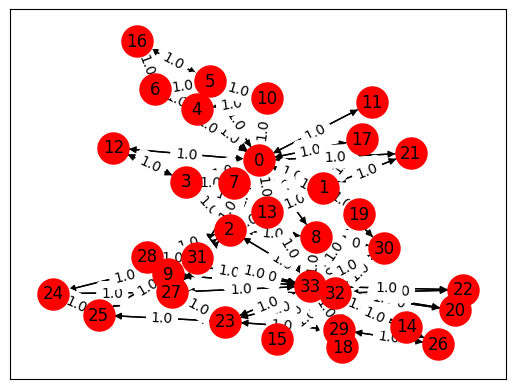

In [5]:
gb.viz.draw(M)

Используя python-graphblas реализовать наивный алгоритм, для матрицы смежности вычисляющий и возвращающий количество треугольников неориентированного графа.

- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно)

- Функция возвращает число – количество треугольников в графе

In [6]:
def naiveA3(A):
    A1 = A.mxm(A)
    A2 = A1.mxm(A)
    A3 = A2.diag()

    # след матрицы
    s = int(A3.reduce(gb.agg.sum).value or 0)
    # количество треугольников в графе
    # 3 вершины и 2 направления - делим на 6
    result = s / 6
    return result

In [7]:
naiveA3(M)

45.0

Используя python-graphblas реализовать наивный алгоритм с маской, для матрицы смежности вычисляющий и возвращающий количество треугольников неориентированного графа
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно)
- Функция возвращает число – количество треугольников в графе.

In [8]:
def naiveMaskA2(A):
    A1 = A.mxm(A)

    # маска
    mask = A.dup(dtype=dtypes.BOOL)
    A1_mask = A1.dup(mask=mask)

    s = int(A1_mask.reduce_scalar(gb.monoid.plus).value or 0)
    # количество треугольников в графе
    # 3 вершины и 2 направления - делим на 6
    result = s/6
    return result

In [9]:
naiveMaskA2(M)

45.0

Используя python-graphblas реализовать Сohen's algorithm, вычисляющий количество треугольников неориентированного графа
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно)
- Функция возвращает число – количество треугольников в графе.

In [10]:
def cohen(A):
    # нижнетреугольная и верхнетреугольная матрицы
    left_matrix = gb.select.tril(A)
    upper_matrix = gb.select.triu(A)

    # маска
    mask = A.dup(dtype=dtypes.BOOL)
    left_upper_mask = left_matrix.mxm(upper_matrix).dup(mask=mask)
    s = int(left_upper_mask.reduce_scalar(gb.monoid.plus).value or 0)

    # проход считали дважды - делим на 2
    result = s/2
    return result

In [11]:
cohen(M)

45.0

Используя python-graphblas реализовать Sandia algorithm, вычисляющий количество треугольников неориентированного графа
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно)
- Функция возвращает число – количество треугольников в графе

In [12]:
def sandia_algorithm(A):
    # нижнетреугольная матрица
    lower_matrix = gb.select.tril(A)

    # маска
    mask = lower_matrix.dup(dtype=dtypes.BOOL)
    lower_mask = lower_matrix.mxm(lower_matrix).dup(mask=mask)

    result = float(lower_mask.reduce_scalar(gb.monoid.plus).value or 0)
    return result

Используя python-graphblas реализовать функцию, вычисляющую для каждой вершины неориентированного графа количество треугольников, в которых она участвует
- Функция принимает представление неориентированного графа, удобное для неё (загрузка, конвертация и проверка неориентированности реализованы отдельно).
- Функция возвращает массив, где для каждой вершины указано, в скольки треугольниках она участвует.

In [ ]:
def func(A):
    A1 = A.mxm(A)
    # маска
    mask = A.dup(dtype=dtypes.BOOL)
    A1_mask = A1.dup(mask=mask)

    # треугольники в которых участвует вершина (2 направления - делим на 2)
    s = A1_mask.reduce_columnwise(monoid.plus)/2
    return s.to_dict()

In [ ]:
func(M)

### Тесты

In [ ]:
def test(A):
    result = [naiveA3(A), naiveMaskA2(A), cohen(A), sandia_algorithm(A)]
    print(result)
    if not all(element == element for element in result):
       print("All return values are not equal")
    else:
        %timeit naiveA3(A)
        %timeit naiveMaskA2(A)
        %timeit cohen(A)
        %timeit sandia_algorithm(A)

In [ ]:
test(M)